# Bike Price Prediction



### Life Cycle of ML Project
- Understanding the problem
- Data Collection
- Data Checks to perform 
- Exploratory data analysis
- Data Pre-processing

## 1) Problem Statement
- This project understands how the student's performance (test score) is affected by other variables such as amount, cc_type, kms_driven. 

## 2) Data Collection
- Dataset got scraped form - https://www.bikedekho.com/
- Dataset consists of 9-columns :  
-- company,  
-- model,  
-- year,  
-- kms_driven,  
-- cc_type,  
-- fuel_type,  
-- place,  
-- ownership,  
-- price

- Data consists of approx 5.5k rows 

### 2.1 Import Data and required packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the csv data as DataFrame

In [2]:
df = pd.read_csv('../data/BikeDekho.csv')

In [3]:
df

,Unnamed: 0,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
0,0,Hero Honda,Passion Plus,2013,30000,Upto 100 cc,petrol,ahmedabad,First,40000
1,1,Hero,Motocorp Passion Pro Electric Start,2015,47500,Upto 100 cc,petrol,ahmedabad,First,30000
2,2,Hero,Motocorp Passion Pro Electric Start With Disc ...,2015,40000,Upto 100 cc,petrol,ahmedabad,First,30000
3,3,Hero,HF Deluxe Alloy Self Start,2017,30000,Upto 100 cc,petrol,ahmedabad,First,20000
4,4,TVS,XL100 Heavy Duty i Touch Start,2018,43000,Upto 100 cc,petrol,ahmedabad,First,30000
...,...,...,...,...,...,...,...,...,...,...
5737,5737,Honda,CD 110 Dream Self Start,2018,14000,100 - 125 cc,petrol,yerraguntla,First,43500
5738,5738,Hero,HF Deluxe Spoke Self Start,2015,40000,Upto 100 cc,petrol,zirakpur,First,36000
5739,5739,Honda,Activa 125 Deluxe,2014,11000,100 - 125 cc,petrol,zirakpur,First,35000
5740,5740,Bajaj,Pulsar 135LS 2018 STD,2012,22000,125 - 150 cc,petrol,zirakpur,Second,25000


In [4]:
df.sample(5)

,Unnamed: 0,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
3729,3729,Honda,Shine Drum Brake,2009,78000,100 - 125 cc,petrol,haridwar,First,23000
3118,3118,TVS,Scooty Pep,2012,280000,Upto 100 cc,petrol,bikaner,First,15000
4286,4286,Hero,Motocorp Passion Pro Electric Start With Drum ...,2015,20000,Upto 100 cc,petrol,kurnool,First,40000
812,812,Honda,Activa 3G STD,2016,1200,100 - 125 cc,petrol,delhi,First,42000
2251,2251,Royal Enfield,Classic 350 S,2014,24000,250 - 500 cc,petrol,mumbai,First,80000


In [5]:
df.shape

(5742, 10)

### 2.2 Dataset Information

- Company
- Model 
- Year  -------------> Year of purchasing
- CC Type -------> Engine capacity
- Fuel_Type ----> Petrol / Electric
- Place -----------> Place of Buying/Selling
- Ownership ---> First hand / Second hand / Thrid Hand / Fourth hand 
- Price -----------> Output variable

## 3) Data checks to perform

- Check missing values
- Check Duplicates
- Check Data Types
- Check the number of unique values of each column
- Check Statistics of data set
- Check Various categoreis present in the different categorical columns

### 3.1 Check missing values

In [6]:
df.isna().sum()

Unnamed: 0    0
company       0
model         0
year          0
kms_driven    0
cc_type       0
fuel_type     0
place         0
ownership     0
price         0
dtype: int64

Null values present in -
- price 
- ownership
- model
- fuel type

In [7]:
df = df[df.price.notna()]
df = df[df.ownership.notna()]
df = df[df.model.notna()]

In [8]:
df.fuel_type.value_counts()

fuel_type
petrol      5738
electric       4
Name: count, dtype: int64

In [9]:
df[df.fuel_type == 'Electric']

,Unnamed: 0,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price


In [10]:
df[df.fuel_type.isna()]

,Unnamed: 0,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price


Bajaj company bikes doesn't contain any Electric vehicle 

In [11]:
df.fuel_type.fillna('Petrol', inplace=True)

In [12]:
df.fuel_type.isna().sum()

0

In [13]:
df.isna().sum()

company       0
model         0
year          0
kms_driven    0
cc_type       0
fuel_type     0
place         0
ownership     0
price         0
dtype: int64

### 3.2 Check duplicates

In [14]:
df.duplicated().sum()

127

In [15]:
df.drop(index=df[df.duplicated()].index, inplace=True)

In [16]:
df.duplicated().sum()

0

### 3.3 Check for data types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5746 entries, 0 to 5880
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company     5746 non-null   object
 1   model       5746 non-null   object
 2   year        5746 non-null   int64 
 3   kms_driven  5746 non-null   object
 4   cc_type     5746 non-null   object
 5   fuel_type   5746 non-null   object
 6   place       5746 non-null   object
 7   ownership   5746 non-null   object
 8   price       5746 non-null   object
dtypes: int64(1), object(8)
memory usage: 448.9+ KB


In [18]:
df.price.sample(10)

586        25,000
2040       40,000
2330    3.35 Lakh
1408       20,000
1841       75,000
2466       35,000
4011       20,000
1484    1.45 Lakh
5447       15,000
4767       1 Lakh
Name: price, dtype: object

In [19]:
def chng_price_to_int(string):
    if 'lakh' in string.lower():
        string = string.lower().replace('lakh', '')
        string = float(string)*100000
        return int(string)
    elif ',' in string:
        string = string.replace(',', '')
        return int(string)
    return string


In [20]:
chng_price_to_int('5.20 lakh')

520000

In [21]:
df['price'] = df.apply(lambda row : chng_price_to_int(row['price']), axis = 1)
df['price'] = df['price'].astype('int')

In [22]:
df.kms_driven.sample(20)

2102    13,500 km
1732    37,000 km
905     68,000 km
1656    20,000 km
1493    30,000 km
2255    35,000 km
4263     7,956 km
5582    20,000 km
3741    18,500 km
3326    12,000 km
1372    35,000 km
5187    15,000 km
3396    20,000 km
3219    45,000 km
1490    25,000 km
5502    19,000 km
3600    12,000 km
2995    52,000 km
1346     6,868 km
4161    70,000 km
Name: kms_driven, dtype: object

In [23]:
def chng_kms_to_int(string):
    string = string.replace('km', '')
    if 'Lakh' in string:
        string = string.replace('Lakh', '')
        string = float(string)*100000
        return int(string)
    elif ',' in string:
        string = string.replace(',', '')
        return int(string)
    return string


In [24]:
df['kms_driven'] = df.apply(lambda row : chng_kms_to_int(row['kms_driven']), axis = 1)
df['kms_driven'] = df['kms_driven'].astype('int')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5746 entries, 0 to 5880
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company     5746 non-null   object
 1   model       5746 non-null   object
 2   year        5746 non-null   int64 
 3   kms_driven  5746 non-null   int64 
 4   cc_type     5746 non-null   object
 5   fuel_type   5746 non-null   object
 6   place       5746 non-null   object
 7   ownership   5746 non-null   object
 8   price       5746 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 448.9+ KB


### 3.4 Checking the number of unique values of each column

In [26]:
df.nunique()

company         37
model          674
year            23
kms_driven    1005
cc_type        136
fuel_type        4
place          755
ownership        4
price          285
dtype: int64

In [27]:
def chng_cc_values(string):
    strt = string.find('(')
    return string[:strt]

In [28]:
chng_cc_values('150cc-200cc(10)')

'150cc-200cc'

In [29]:
df['cc_type'] =  df.apply(lambda row : chng_cc_values(row['cc_type']), axis = 1)

In [30]:
df.cc_type.value_counts()

cc_type
100 - 125 cc      1543
150 - 200 cc      1202
125 - 150 cc       902
250 - 500 cc       775
Upto 100 cc        695
200 - 250 cc       394
1000 and above     149
500 - 1000 cc       82
Electric\n           2
Scooters\n           2
Name: count, dtype: int64

In [31]:
df[df['cc_type']=='Scooters\n']

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
4112,Hero,Electric Photon 48V STD,2017,10000,Scooters\n,Electric,jhalawar,First,22000
5203,Komaki,XGT KM STD,2019,1000,Scooters\n,Electric,saharsa,First,40000


In [32]:
df[df['cc_type']=='Electric\n']

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
4111,Hero,Electric Photon 48V STD,2017,10000,Electric\n,Electric,jhalawar,First,22000
5202,Komaki,XGT KM STD,2019,1000,Electric\n,Electric,saharsa,First,40000


In [33]:
df.drop(index=[4111,4112,5202,5203], inplace=True)

In [34]:
df.cc_type.unique()

array(['Upto 100 cc', '100 - 125 cc', '125 - 150 cc', '150 - 200 cc',
       '200 - 250 cc', '250 - 500 cc', '500 - 1000 cc', '1000 and above'],
      dtype=object)

### 3.5 Check statistics of dataset

In [35]:
df.describe()

,year,kms_driven,price
count,5742.000000,5742.000000,5.742000e+03
mean,2015.169801,29480.219262,6.780769e+04
std,3.078021,30566.403157,8.960961e+04
min,1995.000000,100.000000,1.000000e+00
25%,2013.250000,11844.000000,3.300000e+04
50%,2016.000000,23000.000000,5.000000e+04
75%,2017.000000,40000.000000,8.000000e+04
max,2022.000000,488999.000000,2.450000e+06


### 3.7 Exploring Data

In [36]:
print("Categories in 'company' variable:    ", end=' ')
print(df['company'].unique())

Categories in 'company' variable:     ['Hero Honda' 'Hero' 'TVS' 'Discover' 'Honda' 'Bajaj' 'Suzuki' 'others'
 'Mahindra' 'Yamaha' 'KTM' 'kawasaki' 'BS6' 'Royal Enfield' 'ES' 'Tvs'
 'Street' 'Vespa' 'Aprilia' 'Husqvarna' 'UM' 'Hyosung' 'Harley Davidson'
 'Kawasaki' 'BMW' 'Harley-Davidson' 'Slingshot' 'Platina' 'Piaggio'
 'Black' 'Jawa' 'Ducati' 'Benelli' 'Okinawa' 'Ampere' 'Triumph']


In [37]:
df.loc[df['company']=='Discover']

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
9,Discover,100,2012,30000,Upto 100 cc,Petrol,ahmedabad,First,20000
10,Discover,100,2011,200000,Upto 100 cc,Petrol,ahmedabad,First,20000
11,Discover,100,2011,80000,Upto 100 cc,Petrol,ahmedabad,First,20000
85,Discover,100,2015,3317,Upto 100 cc,Petrol,bangalore,First,36000
94,Discover,100,2012,60000,Upto 100 cc,Petrol,bangalore,First,40000
99,Discover,100,2014,34000,Upto 100 cc,Petrol,bangalore,First,25000
493,Discover,100,2012,30000,Upto 100 cc,Petrol,chandigarh,First,16000
523,Discover,100,2014,62000,Upto 100 cc,Petrol,chennai,First,25000
750,Discover,100,2012,62000,Upto 100 cc,Petrol,delhi,First,20000
754,Discover,100,2010,74000,Upto 100 cc,Petrol,delhi,First,25000


In [38]:
df.loc[df['company']=='Discover', 'model'] = (df[df['company']=='Discover']['company']+' '+df[df['company']=='Discover']['model'])
# df[df['company']=='Discover'].sample(5)
df.loc[df['company']=='Discover', 'company'] = 'Bajaj'
df[df['company']=='Discover']

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price


In [39]:
# df[df['company']=='Platina'].sample(5)
df.loc[df['company']=='Platina', 'model'] = (df[df['company']=='Platina']['company']+' '+df[df['company']=='Platina']['model'])
df.loc[df['company']=='Platina', 'company'] = 'Bajaj'
df.loc[df['company']=='Platina']

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price


In [40]:
df.loc[df['company']=='BS6']

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
73,BS6,Royal Enfield Classic 350 Signals Edition,2019,20047,250 - 500 cc,Petrol,ahmedabad,First,165000
1211,BS6,Royal Enfield Classic 350 Dual-channel ABS,2018,5800,250 - 500 cc,Petrol,delhi,First,140000
1212,BS6,Royal Enfield Classic 350 Black,2017,21000,250 - 500 cc,Petrol,delhi,First,110000
4266,BS6,TVS Apache RTR 160 4V Disc,2019,5000,150 - 200 cc,Petrol,karur,First,60000
4363,BS6,Royal Enfield Classic 350 Black,2017,31500,250 - 500 cc,Petrol,kottayam,First,125000
4542,BS6,Royal Enfield Classic 350 Dual-channel ABS,2019,3936,250 - 500 cc,Petrol,meerut,First,170000
4712,BS6,Royal Enfield Classic 350 Single-channel ABS,2018,13504,250 - 500 cc,Petrol,nalgonda,First,120000
4937,BS6,Royal Enfield Classic 350 Black,2018,6500,250 - 500 cc,Petrol,pithoragarh,First,120000
4966,BS6,Royal Enfield Classic 350 Gunmetal Grey,2020,3300,250 - 500 cc,Petrol,purnia,First,160000
5218,BS6,Royal Enfield Classic 350 Black,2017,20000,250 - 500 cc,Petrol,samastipur,Second,125000


In [41]:
df.loc[4266, 'company'] = 'TVS'

In [42]:
df.loc[df['company']=='BS6']

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
73,BS6,Royal Enfield Classic 350 Signals Edition,2019,20047,250 - 500 cc,Petrol,ahmedabad,First,165000
1211,BS6,Royal Enfield Classic 350 Dual-channel ABS,2018,5800,250 - 500 cc,Petrol,delhi,First,140000
1212,BS6,Royal Enfield Classic 350 Black,2017,21000,250 - 500 cc,Petrol,delhi,First,110000
4363,BS6,Royal Enfield Classic 350 Black,2017,31500,250 - 500 cc,Petrol,kottayam,First,125000
4542,BS6,Royal Enfield Classic 350 Dual-channel ABS,2019,3936,250 - 500 cc,Petrol,meerut,First,170000
4712,BS6,Royal Enfield Classic 350 Single-channel ABS,2018,13504,250 - 500 cc,Petrol,nalgonda,First,120000
4937,BS6,Royal Enfield Classic 350 Black,2018,6500,250 - 500 cc,Petrol,pithoragarh,First,120000
4966,BS6,Royal Enfield Classic 350 Gunmetal Grey,2020,3300,250 - 500 cc,Petrol,purnia,First,160000
5218,BS6,Royal Enfield Classic 350 Black,2017,20000,250 - 500 cc,Petrol,samastipur,Second,125000


The data that contain `BS6` as company is of `royal enfield` company only

In [43]:
df.loc[df['company']=='BS6', 'model'] = df.loc[df['company']=='BS6','model'].str.replace('Royal Enfield ', '')
df.loc[df['company']=='BS6', 'company'] = 'Royal Enfield'
# df.loc[df['company']=='BS6']

In [44]:
print("Categories in 'company' variable:    ", end=' ')
print(df['company'].unique())

Categories in 'company' variable:     ['Hero Honda' 'Hero' 'TVS' 'Bajaj' 'Honda' 'Suzuki' 'others' 'Mahindra'
 'Yamaha' 'KTM' 'kawasaki' 'Royal Enfield' 'ES' 'Tvs' 'Street' 'Vespa'
 'Aprilia' 'Husqvarna' 'UM' 'Hyosung' 'Harley Davidson' 'Kawasaki' 'BMW'
 'Harley-Davidson' 'Slingshot' 'Piaggio' 'Black' 'Jawa' 'Ducati' 'Benelli'
 'Okinawa' 'Ampere' 'Triumph']


In [45]:
df.loc[df['company'] == 'Tvs', 'company'] = 'TVS'
df.loc[df['company']=='Harley-Davidson', 'company'] = 'Harley Davidson'

In [46]:
df.loc[df['company']=='Piaggio']

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
791,Piaggio,Vespa S 125,2015,37000,100 - 125 cc,Petrol,delhi,First,50000
1342,Piaggio,Vespa LX 125 STD,2018,1800,100 - 125 cc,Petrol,ghaziabad,First,70000
1573,Piaggio,Vespa LX 125 STD,2015,31000,100 - 125 cc,Petrol,hyderabad,First,50000
1576,Piaggio,Vespa LX 125 STD,2018,9300,100 - 125 cc,Petrol,hyderabad,First,75000
1577,Piaggio,Vespa LX 125 STD,2018,9600,100 - 125 cc,Petrol,hyderabad,First,75000
2403,Piaggio,Vespa LX 125 STD,2018,20000,100 - 125 cc,Petrol,patna,First,60000
2456,Piaggio,Vespa Lx 125,2013,45000,100 - 125 cc,Petrol,pune,First,32000
4744,Piaggio,Vespa S 125,2014,18000,100 - 125 cc,Petrol,navi-mumbai,Second,35000


And another thing here is `piaggio` and `Vespa` are same companies

In [47]:
df.loc[df['company']=='Piaggio', 'company'] = 'Vespa'

In [48]:
print("Categories in 'company' variable:    ", end=' ')
print(df['company'].unique())

Categories in 'company' variable:     ['Hero Honda' 'Hero' 'TVS' 'Bajaj' 'Honda' 'Suzuki' 'others' 'Mahindra'
 'Yamaha' 'KTM' 'kawasaki' 'Royal Enfield' 'ES' 'Street' 'Vespa' 'Aprilia'
 'Husqvarna' 'UM' 'Hyosung' 'Harley Davidson' 'Kawasaki' 'BMW' 'Slingshot'
 'Black' 'Jawa' 'Ducati' 'Benelli' 'Okinawa' 'Ampere' 'Triumph']


In [49]:
df.loc[df['company']=='others']['model'].value_counts()

model
220                                  53
125                                  18
125 M Disc                           15
100M                                 13
2019 Suzuki Gixxer STD                4
100 M Disc                            3
150                                   2
2019 Bajaj Dominar 400 STD            2
2015 KTM 390 Duke STD                 2
100 Spoke Wheel                       1
2019 Honda Activa 125 BS6 Drum        1
2019 Honda Activa 125 Standard        1
 TVS Star City Plus Mono Tone BS6     1
Name: count, dtype: int64

- 2019 Suzuki Gixxer STD
- 2019 Bajaj Dominar 400 STD
- 2015 KTM 390 Duke STD
- 2019 Honda Activa 125 BS6 Drum
- 2019 Honda Activa 125 Standard
-  TVS Star City Plus Mono Tone BS6

In [50]:
df.loc[df['model']=='2019 Suzuki Gixxer STD']

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
286,others,2019 Suzuki Gixxer STD,2019,5900,150 - 200 cc,Petrol,bangalore,First,85000
1045,others,2019 Suzuki Gixxer STD,2019,7000,150 - 200 cc,Petrol,delhi,First,100000
4360,others,2019 Suzuki Gixxer STD,2019,10000,150 - 200 cc,Petrol,kottayam,First,100000
4914,others,2019 Suzuki Gixxer STD,2019,10000,150 - 200 cc,Petrol,perambalur,First,80000


In [51]:
df.loc[[286,1045,4360,4914], 'model'] = 'Gixxer STD'
df.loc[[286,1045,4360,4914], 'company'] = 'Suzuki'

In [52]:
df.loc[df['model']=='2019 Bajaj Dominar 400 STD']

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
2309,others,2019 Bajaj Dominar 400 STD,2019,30000,250 - 500 cc,Petrol,mumbai,First,180000
3736,others,2019 Bajaj Dominar 400 STD,2019,10000,250 - 500 cc,Petrol,guntur,First,80000


In [53]:
for i in df.loc[df['company']=='Bajaj', 'model'].unique():
    if 'Dominar' in i:
        print(i)

Dominar 400 ABS
Dominar 400 STD
Dominar 400
Dominar 400 BS6


In [54]:
df.loc[[2309,3736], 'model'] = 'Dominar 400 STD'
df.loc[[2309,3736], 'company'] = 'Bajaj'

In [55]:
df.loc[df['model']=='2015 KTM 390 Duke STD']

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
5637,others,2015 KTM 390 Duke STD,2015,14000,250 - 500 cc,Petrol,udaipur,First,120000
5652,others,2015 KTM 390 Duke STD,2015,14000,1000 and above,Petrol,udaipur,First,120000


In [56]:
df.loc[[5637,5652], 'model'] = 'RC 390 STD'
df.loc[[5637,5652], 'company'] = 'KTM'

In [57]:
df.loc[df['model']=='2019 Honda Activa 125 BS6 Drum']

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
3186,others,2019 Honda Activa 125 BS6 Drum,2016,30000,100 - 125 cc,Petrol,bijapur,First,38000


In [58]:
df.loc[[3186], 'model'] = 'Activa 125 BS6 Drum'
df.loc[[3186], 'company'] = 'Honda'

In [59]:
df.loc[df['model']=='2019 Honda Activa 125 Standard']

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
4321,others,2019 Honda Activa 125 Standard,2014,36100,100 - 125 cc,Petrol,kolar,First,28000


In [60]:
df.loc[[4321], 'model'] = 'Activa 125 Standard'
df.loc[[4321], 'company'] = 'Honda'

In [61]:
df.loc[df['model']==' TVS Star City Plus Mono Tone BS6']

,company,model,year,kms_driven,cc_type,fuel_type,place,ownership,price
5808,others,TVS Star City Plus Mono Tone BS6,2016,20380,100 - 125 cc,Petrol,viluppuram,First,50000


In [62]:
df.loc[5808, 'model'] = 'Star City Plus Mono Tone BS6'
df.loc[5808, 'company'] = 'TVS'

In [63]:
df.loc[df['company']=='others']['model'].value_counts()

model
220                53
125                18
125 M Disc         15
100M               13
100 M Disc          3
150                 2
100 Spoke Wheel     1
Name: count, dtype: int64

In [64]:
df['fuel_type'].unique()

array(['Petrol', 'petrol', 'Electric', 'PETROL'], dtype=object)

In [65]:
df['fuel_type'] = df.apply(lambda row : row['fuel_type'].lower(), axis = 1)
df['fuel_type'].unique()

array(['petrol', 'electric'], dtype=object)

In [66]:
print("Categories in 'Fuel type' variable:    ", end=' ')
print(df['fuel_type'].unique(), end='\n\n')

print("Categories in 'company' variable:    ", end=' ')
print(df['company'].unique(), end='\n\n')

print("Categories in 'year' variable:    ", end=' ')
print(df['year'].unique(), end='\n\n')

print("Categories in 'CC type' variable:    ", end=' ')
print(df['cc_type'].unique(), end='\n\n')

print("Categories in 'ownership' variable:    ", end=' ')
print(df['ownership'].unique(), end='\n\n')

Categories in 'Fuel type' variable:     ['petrol' 'electric']

Categories in 'company' variable:     ['Hero Honda' 'Hero' 'TVS' 'Bajaj' 'Honda' 'Suzuki' 'others' 'Mahindra'
 'Yamaha' 'KTM' 'kawasaki' 'Royal Enfield' 'ES' 'Street' 'Vespa' 'Aprilia'
 'Husqvarna' 'UM' 'Hyosung' 'Harley Davidson' 'Kawasaki' 'BMW' 'Slingshot'
 'Black' 'Jawa' 'Ducati' 'Benelli' 'Okinawa' 'Ampere' 'Triumph']

Categories in 'year' variable:     [2013 2015 2017 2018 2012 2016 2011 2010 2014 2009 2019 2005 2007 2004
 2020 2008 2006 2022 2021 2003 1999 1995 2002]

Categories in 'CC type' variable:     ['Upto 100 cc' '100 - 125 cc' '125 - 150 cc' '150 - 200 cc' '200 - 250 cc'
 '250 - 500 cc' '500 - 1000 cc' '1000 and above']

Categories in 'ownership' variable:     ['First' 'Second' 'Thrid' 'Fourth']



In [67]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

In [68]:
print(f"We have {len(numerical_features)} Numerical Features : {numerical_features}", end='\n\n')
print(f"We have {len(categorical_features)} Numerical Features : {categorical_features}")

We have 3 Numerical Features : ['year', 'kms_driven', 'price']

We have 6 Numerical Features : ['company', 'model', 'cc_type', 'fuel_type', 'place', 'ownership']


In [77]:
df.reset_index(drop=True, inplace=True)

In [78]:
df.to_csv('../data/BikeDekho.csv', index=None)

## 4) Exploring Data (Vizualization)

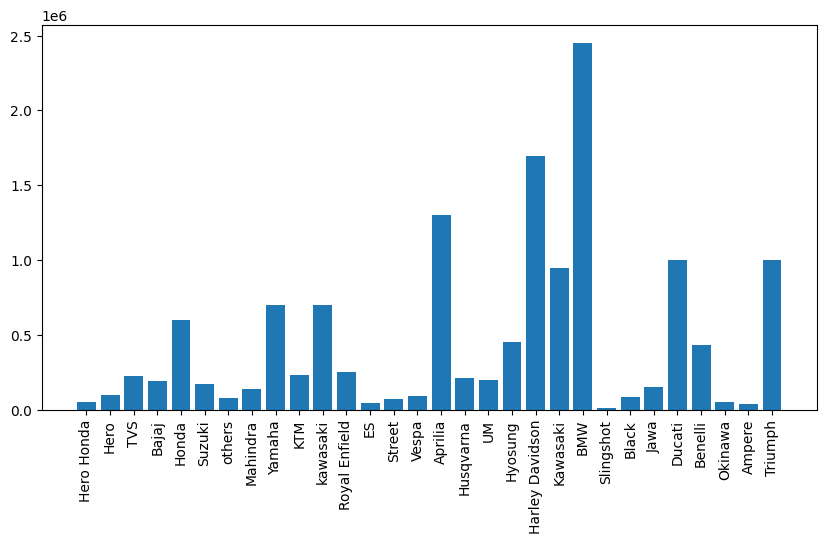

In [98]:
# fig, ax = plt.subplots()
plt.figure(figsize=(10,5))
plt.bar(df['company'],df['price'])
plt.xticks(rotation = 90) 
plt.show()

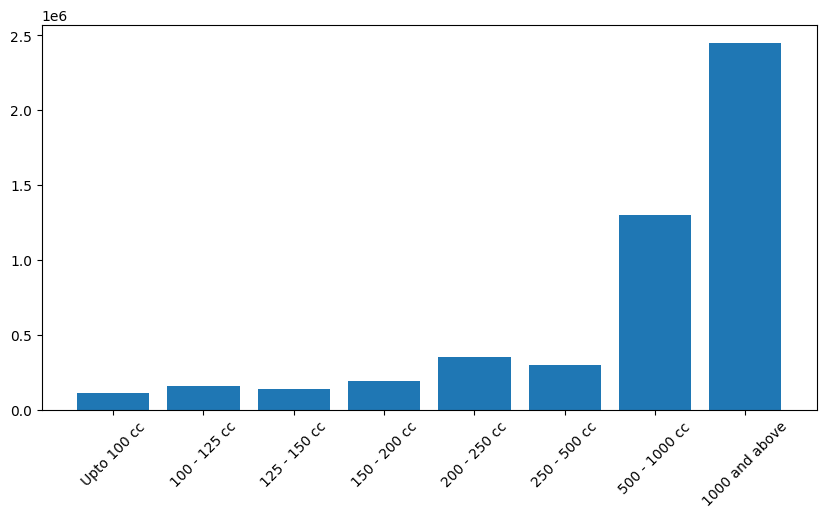

In [99]:
plt.figure(figsize=(10,5))
plt.bar(df['cc_type'],df['price'])
plt.xticks(rotation = 45) 
plt.show()

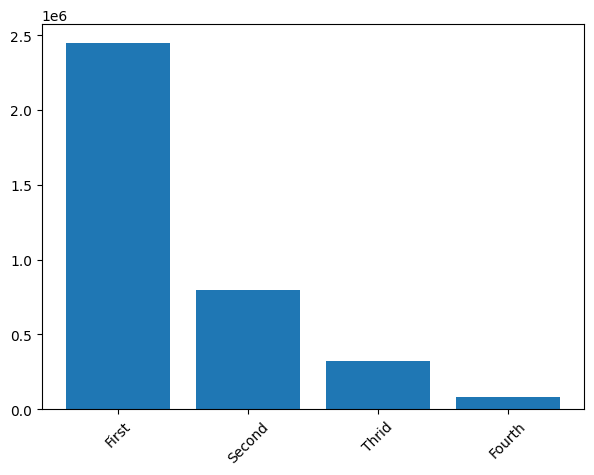

In [100]:
plt.figure(figsize=(7,5))
plt.bar(df['ownership'],df['price'])
plt.xticks(rotation = 45) 
plt.show()

<Axes: xlabel='kms_driven', ylabel='price'>

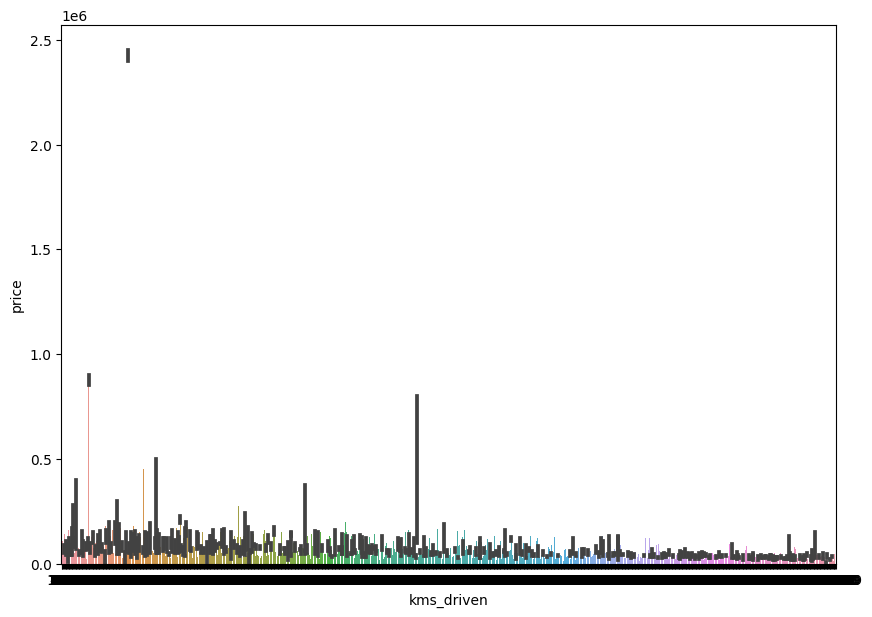

In [113]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['kms_driven'], y=df['price'],estimator='median', n_boot=100000)